In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from tabs import DihedralInfoFromTorsionLib
from tabs import custom
import mdtraj as md
import numpy as np

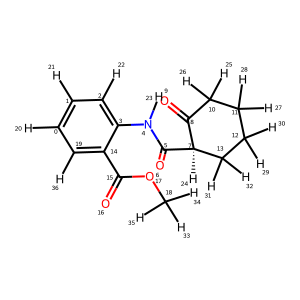

In [2]:
mol = Chem.AddHs(Chem.MolFromSmiles("[H]c1c([H])c([H])c(N([H])C(=O)[C@@]2([H])C(=O)C([H])([H])C([H])([H])C([H])([H])C2([H])[H])c(C(=O)OC([H])([H])[H])c1[H]"))
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 300,300
mol

Building the TorsionInfoList object

In [3]:
info = DihedralInfoFromTorsionLib(mol)

In [4]:
info.GetnTABS()

360

In [5]:
info.smarts, info.indices, info.multiplicities, info.bounds, info.torsionTypes

(['[O:1]=[C:2]!@;-[O:3]~[C:4]',
  '[$(C=O):1][NX3:2]!@;-[!#1:3][!#1:4]',
  '[O:1]=[CX3:2]!@;-[NX3H1:3][!#1:4]',
  '[C:1][CX4:2]!@;-[CX3:3]=[O:4]',
  '[$([cH0]!@;-[*^2]):1][c:2]([cH1])!@[CX3:3]=[O:4]',
  '[!#1;r{5-8}:1]@[C^2;r{5-6}:2]@;-[C;r{5-6}:3]@[!#1;r{5-8}:4]',
  '[!#1;r{5-8}:1]@[C^2;r{5-6}:2]@;-[C;r{5-6}:3]@[!#1;r{5-8}:4]',
  '[C^2,c,x4;r{5-8}:1]@[CX4;r{5-8}:2]@;-[CX4;r{5-8}:3]@[!#1;r{5-8}:4]',
  '[C^2,c,x4;r{5-8}:1]@[CX4;r{5-8}:2]@;-[CX4;r{5-8}:3]@[!#1;r{5-8}:4]',
  '[!#1;r{5-8}:1]@[CX4;r{5-8}:2]@;-[CX4;r{5-8}:3]@[!#1;r{5-8}:4]',
  '[!#1;r{5-8}:1]@[CX4;r{5-8}:2]@;-[CX4;r{5-8}:3]@[!#1;r{5-8}:4]'],
 [[16, 15, 17, 18],
  [5, 4, 3, 2],
  [6, 5, 4, 3],
  [8, 7, 5, 6],
  [3, 14, 15, 16],
  [7, 8, 10, 11],
  [10, 8, 7, 13],
  [8, 7, 13, 12],
  [8, 10, 11, 12],
  [7, 13, 12, 11],
  [10, 11, 12, 13]],
 [1, 4, 1, 3, 2, 3, 3, 6, 6, 3, 3],
 [array([3.14159265]),
  array([0.78539816, 2.35619449, 3.92699082, 5.49778714]),
  array([3.14159265]),
  array([1.04719755, 3.14159265, 5.21853446]),
  

In [6]:
customProfiles = custom.GetTorsionProfilesFromMDTraj(md.load("../Data/Tests/traj.h5"), info.indices)
customProfiles.shape

/localhome/braunje/.conda/envs/tabs/lib/python3.10/site-packages/mdtraj/core/trajectory.py:441: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn("top= kwargs ignored since this file parser does not support it")


(250, 11)

Calculating profile and fit for a single dihedral

In [7]:
binsize = np.pi*2/36
yHists, yHistsCount, xHist = custom.ComputeTorsionHistograms(customProfiles,binsize)

In [16]:
coeffs, peaks = custom.ComputeGaussianFit(xHist,yHists[3],yHistsCount[3],binsize)

In [17]:
from tabs import fits

In [18]:
xFit = np.linspace(0, 2*np.pi, 2*len(xHist))
yFit = fits.FitFunc.GAUSS.call(coeffs, xFit)

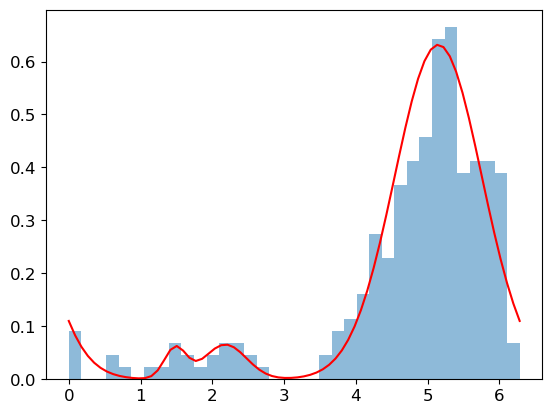

In [20]:
import matplotlib.pyplot as plt
plt.bar(xHist, yHists[3], width=binsize, alpha=0.5, label='histogram')
plt.plot(xFit, yFit, color='red', label='fit')

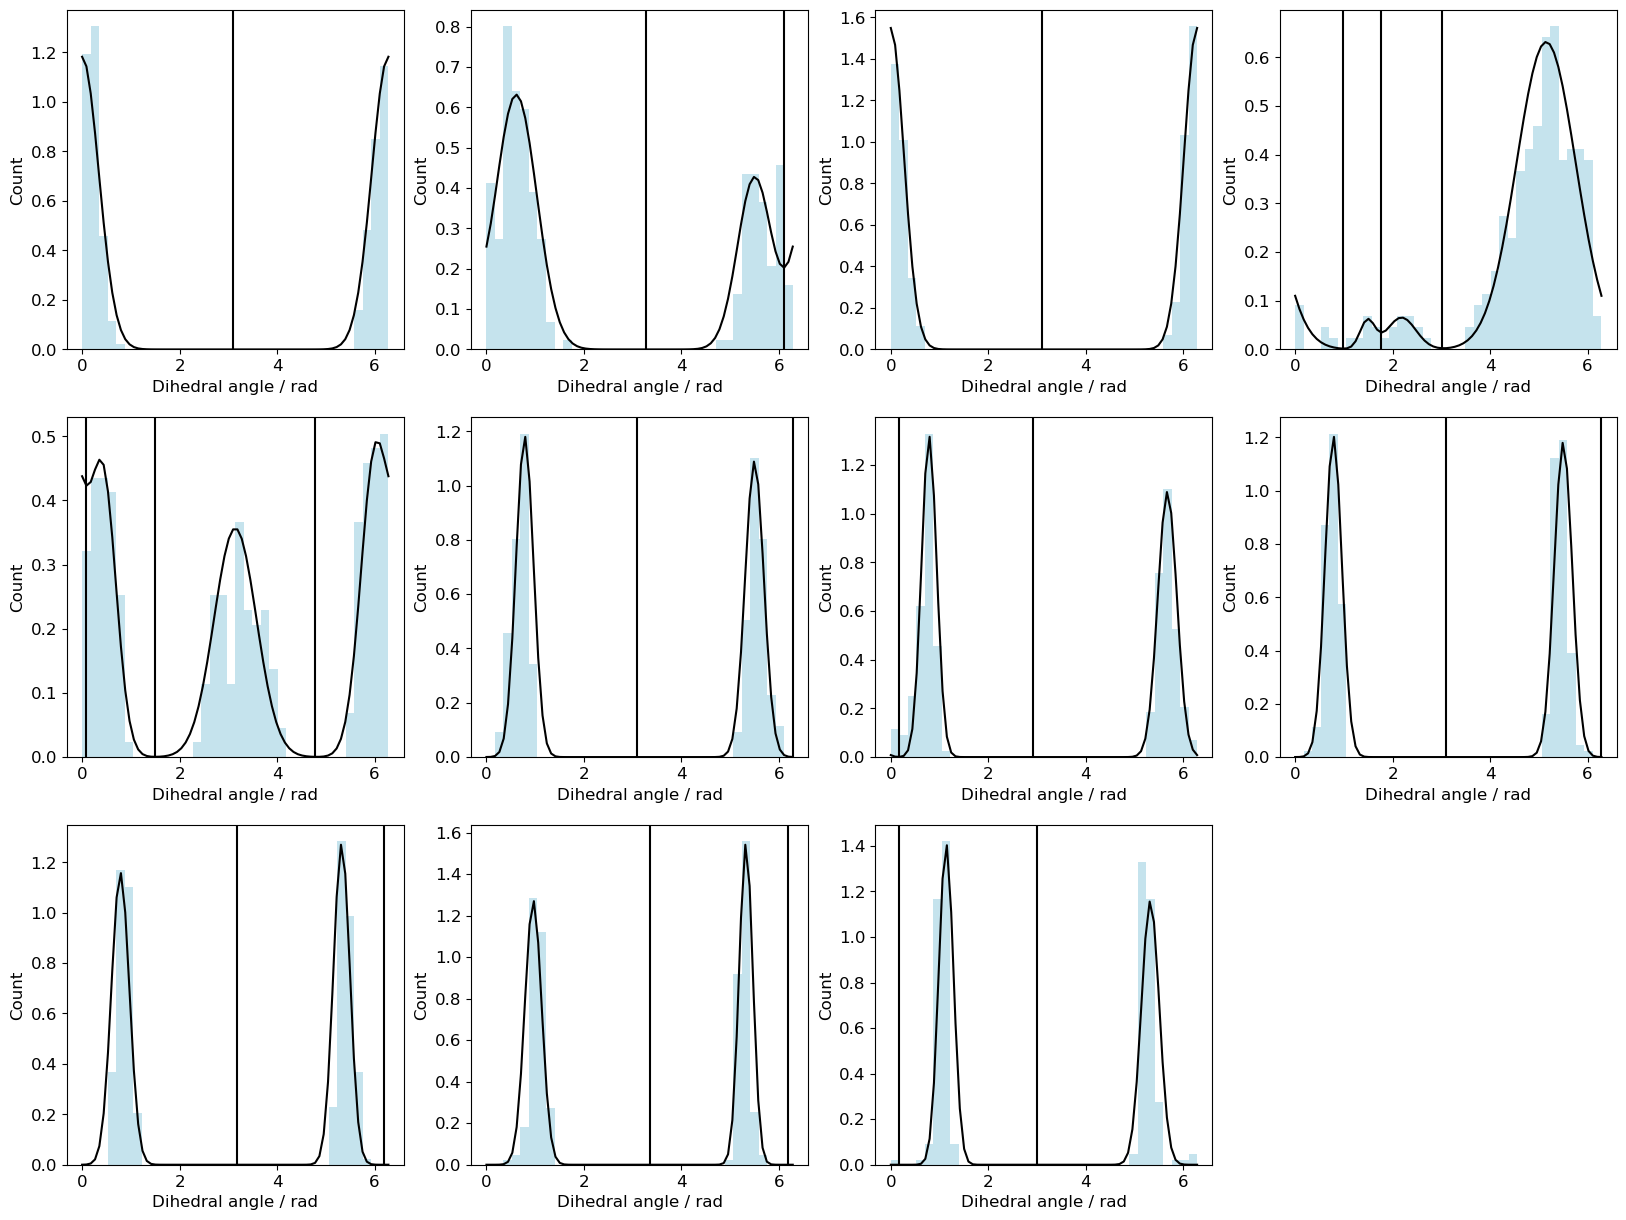

In [24]:
# excludePeaks=1e-2, prominence=1e-2, mergePeaks=True
info2 = custom.CustomDihedralInfo(mol, info.indices, customProfiles, showFits=True)